In [1]:
import numpy as np

def find_boundaries(grid):
    nrows, ncols = grid.shape
    boundaries = {}
    
    # 8 방향을 확인하기 위한 offsets 정의
    offsets = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]
    
    def is_boundary(r, c, color):
        for dr, dc in offsets:
            nr, nc = r + dr, c + dc
            if 0 <= nr < nrows and 0 <= nc < ncols:
                if grid[nr, nc] != color:
                    return True
            else:
                # 그리드 경계에 위치한 경우도 boundary로 간주
                return True
        return False
    
    for r in range(nrows):
        for c in range(ncols):
            color = grid[r, c]
            if color == -1: continue  # 비활성 셀 무시
            if color not in boundaries:
                boundaries[color] = set()
            if is_boundary(r, c, color):
                boundaries[color].add((r, c))
    
    return boundaries

def calculate_vertices_and_edges(boundaries):
    vertices_edges_count = {}
    
    for color, b_set in boundaries.items():
        # 본 예제에서는 모든 경계 셀을 꼭지점으로 간주
        vertices_count = len(b_set)
        # 꼭지점 수와 동일하게 벽면 수를 설정
        edges_count = vertices_count
        vertices_edges_count[color] = (vertices_count, edges_count)
    
    return vertices_edges_count

# 예시 그리드
grid = np.array([
    [2, 2, 2, -1, -1],
    [4, 1, 1, -1, -1],
    [4, 1, 3, -1, -1],
    [4, 4, 3, 3, 3],
    [4, 4, 3, 3, 3]
])

boundaries = find_boundaries(grid)
vertices_edges_count = calculate_vertices_and_edges(boundaries)

for color, (v_count, e_count) in vertices_edges_count.items():
    print(f"Color {color}: Vertices = {v_count}, Edges = {e_count}")
#tested boundary not valid

Color 2: Vertices = 3, Edges = 3
Color 4: Vertices = 6, Edges = 6
Color 1: Vertices = 3, Edges = 3
Color 3: Vertices = 7, Edges = 7


In [11]:
import numpy as np

def calculate_edges_vertices(grid):
    nrows, ncols = grid.shape
    edges_total = 0
    vertices_total = 0

    # 셀과 인접한 셀 사이의 공유되는 에지 및 꼭지점 계산
    shared_edges = 0
    shared_vertices = 0

    for r in range(nrows):
        for c in range(ncols):
            if grid[r, c] == -1:  # 비활성 셀은 무시
                continue
            
            # 각 셀에 대해 4개의 에지와 꼭지점을 가진다고 가정
            edges_total += 4
            vertices_total += 4
            
            # 오른쪽 및 아래쪽 셀과 공유하는 에지 및 꼭지점 확인
            if c < ncols - 1 and grid[r, c] == grid[r, c + 1]:
                shared_edges += 1
                shared_vertices += 2
            if r < nrows - 1 and grid[r, c] == grid[r + 1, c]:
                shared_edges += 1
                shared_vertices += 2
    
    # 전체 에지와 꼭지점에서 공유되는 부분 제외
    edges_total -= shared_edges
    vertices_total -= shared_vertices
    
    return edges_total, vertices_total

# 예시 그리드
grid = np.array([
    [2, 2, 2, -1, -1],
    [4, 1, 1, -1, -1],
    [4, 1, 3, -1, -1],
    [4, 4, 3, 3, 3],
    [4, 4, 3, 3, 3]
])

edges, vertices = calculate_edges_vertices(grid)
print(f"Total Edges: {edges}, Total Vertices: {vertices}")


Total Edges: 58, Total Vertices: 40


In [12]:
import numpy as np

def calculate_group_edges_vertices(grid):
    nrows, ncols = grid.shape
    color_edges_vertices = {}

    for r in range(nrows):
        for c in range(ncols):
            color = grid[r, c]
            if color == -1:  # 비활성 셀은 무시
                continue

            # 색상별로 꼭지점과 에지의 수를 초기화
            if color not in color_edges_vertices:
                color_edges_vertices[color] = {'vertices': 0, 'edges': 0}

            # 기본적으로 각 셀은 4개의 꼭지점과 4개의 에지를 가짐
            color_edges_vertices[color]['vertices'] += 4
            color_edges_vertices[color]['edges'] += 4

            # 인접한 셀과 같은 색상일 경우 공유하는 꼭지점과 에지를 차감
            if r > 0 and grid[r-1, c] == color:  # 상단 셀과 공유
                color_edges_vertices[color]['vertices'] -= 2
                color_edges_vertices[color]['edges'] -= 1
            if c > 0 and grid[r, c-1] == color:  # 왼쪽 셀과 공유
                color_edges_vertices[color]['vertices'] -= 2
                color_edges_vertices[color]['edges'] -= 1

    return color_edges_vertices

# 예시 그리드
grid = np.array([
    [2, 2, 2, -1, -1],
    [4, 1, 1, -1, -1],
    [4, 1, 3, -1, -1],
    [4, 4, 3, 3, 3],
    [4, 4, 3, 3, 3]
])

group_info = calculate_group_edges_vertices(grid)
for color, info in group_info.items():
    print(f"Color {color}: Vertices = {info['vertices']}, Edges = {info['edges']}")


Color 2: Vertices = 8, Edges = 10
Color 4: Vertices = 12, Edges = 18
Color 1: Vertices = 8, Edges = 10
Color 3: Vertices = 12, Edges = 20


In [13]:
import numpy as np

def calculate_edges_vertices_correct(grid):
    nrows, ncols = grid.shape
    color_info = {}

    # 방향 벡터 (상, 하, 좌, 우)
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]

    for r in range(nrows):
        for c in range(ncols):
            color = grid[r, c]
            if color == -1:  # 비활성 셀 무시
                continue

            if color not in color_info:
                color_info[color] = {'cells': 0, 'shared_edges': 0}

            # 셀 수 증가
            color_info[color]['cells'] += 1

            # 인접 셀과 공유하는 에지 확인
            for dr, dc in directions:
                nr, nc = r + dr, c + dc
                if 0 <= nr < nrows and 0 <= nc < ncols and grid[nr, nc] == color:
                    color_info[color]['shared_edges'] += 1

    # 최종 꼭지점과 에지 계산
    for color, info in color_info.items():
        cells = info['cells']
        shared_edges = info['shared_edges']
        edges = cells * 4 - shared_edges  # 공유된 에지를 제외한 총 에지 수
        vertices = cells * 4 - shared_edges * 2  # 공유된 꼭지점을 제외한 총 꼭지점 수
        color_info[color] = {'vertices': vertices, 'edges': edges}

    return color_info

# 그리드 예시
grid = np.array([
    [2, 2, 2, -1, -1],
    [4, 1, 1, -1, -1],
    [4, 1, 3, -1, -1],
    [4, 4, 3, 3, 3],
    [4, 4, 3, 3, 3]
])

color_info = calculate_edges_vertices_correct(grid)
for color, info in color_info.items():
    print(f"Color {color}: Vertices = {info['vertices']}, Edges = {info['edges']}")


Color 2: Vertices = 4, Edges = 8
Color 4: Vertices = 0, Edges = 12
Color 1: Vertices = 4, Edges = 8
Color 3: Vertices = -4, Edges = 12


In [14]:
import numpy as np

def find_boundary_cells(grid):
    nrows, ncols = grid.shape
    boundary_cells = {}

    # 인접 셀 확인을 위한 방향 벡터
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    for r in range(nrows):
        for c in range(ncols):
            color = grid[r, c]
            if color == -1:
                continue  # 비활성 셀은 무시

            if color not in boundary_cells:
                boundary_cells[color] = set()

            # 현재 셀이 경계 셀인지 확인
            for dr, dc in directions:
                nr, nc = r + dr, c + dc
                # 그리드 범위를 벗어나거나 인접한 셀의 색상이 현재 셀과 다를 경우
                if nr < 0 or nr >= nrows or nc < 0 or nc >= ncols or grid[nr, nc] != color:
                    boundary_cells[color].add((r, c))
                    break

    return boundary_cells

# 예시 그리드
grid = np.array([
    [2, 2, 2, -1, -1],
    [4, 1, 1, -1, -1],
    [4, 1, 3, -1, -1],
    [4, 4, 3, 3, 3],
    [4, 4, 3, 3, 3]
])

boundary_cells = find_boundary_cells(grid)
for color, cells in boundary_cells.items():
    print(f"Color {color}: Boundary Cells = {list(cells)}")


Color 2: Boundary Cells = [(0, 1), (0, 2), (0, 0)]
Color 4: Boundary Cells = [(4, 0), (3, 1), (2, 0), (3, 0), (1, 0), (4, 1)]
Color 1: Boundary Cells = [(1, 1), (1, 2), (2, 1)]
Color 3: Boundary Cells = [(4, 4), (3, 4), (4, 3), (4, 2), (3, 3), (2, 2), (3, 2)]


In [15]:

import copy
from collections import deque
from PIL import Image, ImageDraw
s=('(0,0);(0,1);(0,2);(0,3);(1,0);(1,1);(1,2);(1,3);(2,0);(2,1);(2,2);'
   '(3,0);(3,1);(3,2);(4,2);(5,2);(5,3)')
s=[tuple(int(j) for j in i.strip('()').split(',')) for i in s.split(';')]
mx,my=[max(i[j] for i in s) for j in [0,1]]
im=Image.new('RGB',(20*(mx+2),20*(my+2)),(255,255,255))
draw=ImageDraw.Draw(im)
for x,y in s:
    draw.rectangle(tuple(i*20+10 for i in [x,y,x+1,y+1]),
                   fill=(192,192,192),outline=None,width=0)

borders=lambda x,y:[frozenset([(x+a,y+b),(x+c,y+d)])
    for (a,b),(c,d),(e,f) in [
        ((0,0),(0,1),(0,-1)),
        ((0,0),(1,0),(-1,0)),
        ((1,0),(1,1),(0,1)),
        ((0,1),(1,1),(1,0)),
         ]
    if (x+f,y+e) not in s]
edges=sum((borders(*i) for i in s),[])
for e in edges:
    draw.line(tuple(i*20+10 for i in [j for p in e for j in p]),
              fill=(0,0,0),width=1)
#im.show()
adjacent=lambda x,y:[(x+i,y+j) for i,j in
                     [(1,0),(0,1),(-1,0),(0,-1)]]
def bfs(s):
    res,res_p=[],[]
    s=copy.copy(s)
    s_taken=set()
    #assuming 1 connected component
    for x in s:break
    s.remove(x)
    res.append(x)
    p=list(x)[0]
    res_p.append(p)
    q=deque([p])
    #print(p)
    while q:
        p=q.popleft()
        for p1 in adjacent(*p):
            e=frozenset([p,p1])
            if e in s:
                q.append(p1)
                s.remove(e)
                res.append(e)
                res_p.append(p1)
                break
    return res,res_p

ordered_edges,ordered_points=bfs(set(edges))
orientation=lambda x:(lambda y:y[0][0]==y[1][0])(list(x))
res=[]
for e1,p,e2 in zip(ordered_edges,
                   ordered_points,
                   ordered_edges[1:]+ordered_edges[:1]):
    if orientation(e1)!=orientation(e2):
        res.append(p)

for x,y in res:
    draw.ellipse((20*x+10-2,20*y+10-2,20*x+10+2,20*y+10+2),
                 fill=(0,0,255))
im.show()

# Image Draw Example

In [16]:
from PIL import Image, ImageDraw

# 이미지 객체 생성 예시
im = Image.new('RGB', (100, 100), (255, 255, 255))
draw = ImageDraw.Draw(im)

# draw 객체를 사용하여 그리기 작업 수행
# 예: 이미지 중앙에 검은색으로 원 그리기
draw.ellipse((0, 0, 100, 95), outline =(255, 0, 0), fill =(0, 0, 0))

# 예: 이미지에 텍스트 추가
draw.text((10, 10), "Hello", fill=(0, 0, 0))

# 이미지 보기 (Jupyter Notebook 환경에서)
im.show()

# 이미지 파일로 저장
im.save("example.png")


In [17]:
from PIL import Image, ImageDraw
def coordinates_to_grid(coordinates):
    # 좌표 리스트에서 가장 큰 행과 열 값 찾기
    max_row = max(coordinates, key=lambda x: x[0])[0]
    max_col = max(coordinates, key=lambda x: x[1])[1]

    # 그리드 초기화 (가장 큰 인덱스에 +1 해서 크기를 결정)
    grid = [[0 for _ in range(max_col + 1)] for _ in range(max_row + 1)]

    # 주어진 좌표에 해당하는 부분을 1로 설정
    for row, col in coordinates:
        grid[row][col] = 1

    return grid

# 좌표 리스트 s 정의 (예시)

s = [
    (0, 0), (0, 1), (0, 2), (0, 3),
    (1, 0), (1, 1), (1, 2), (1, 3),
    (2, 0), (2, 1), (2, 2), (3, 0),
    (3, 1), (3, 2), (4, 2), (5, 2), (5, 3)
    ]
# 이미지 객체 생성
im = Image.new('RGB', (150, 150), (255, 255, 255))
draw = ImageDraw.Draw(im)

# s 내의 각 좌표에 사각형 그리기
for x, y in s:
    xx,yy,mxx,myy = tuple(i*20+10 for i in [x, y, x+1, y+1])
    draw.rectangle(tuple(i*20+10 for i in [x, y, x+1, y+1]),
                   fill=(192, 192, 192), outline=None, width=0)
    draw.text((xx+5,yy+5), str(x)+str(y), fill=(0,0,0))



# 이미지 보기 (Jupyter Notebook 환경에서)
im.show()

# 또는 이미지 파일로 저장
im.save("output.png")

In [5]:
# first solution
from PIL import Image, ImageDraw

def coordinates_to_grid(coordinates):
    # 좌표 리스트에서 가장 큰 행과 열 값 찾기 (x와 y를 반전)
    max_col = max(coordinates, key=lambda x: x[0])[0]
    max_row = max(coordinates, key=lambda x: x[1])[1]

    # 그리드 초기화 (가장 큰 인덱스에 +1 해서 크기를 결정)
    grid = [[0 for _ in range(max_col + 1)] for _ in range(max_row + 1)]

    # 주어진 좌표에 해당하는 부분을 1로 설정 (x와 y를 반전)
    for y, x in coordinates:
        grid[x][y] = 1

    return grid

# 좌표 리스트 s 정의 (예시)
s = [
    (0, 0), (0, 1), (0, 2), (0, 3),
    (1, 0), (1, 1), (1, 2), (1, 3),
    (2, 0), (2, 1), (2, 2), (3, 0),
    (3, 1), (3, 2), (4, 2), (5, 2), (5, 3)
]

# 이미지 객체 생성
im = Image.new('RGB', (150, 150), (255, 255, 255))
draw = ImageDraw.Draw(im)

# s 내의 각 좌표에 사각형 그리기 (x와 y 반전시켜 그리기)
for y, x in s:  # 좌표 반전
    xx, yy, mxx, myy = tuple(i*20+10 for i in [y, x, y+1, x+1])
    draw.rectangle((xx, yy, mxx, myy), fill=(192, 192, 192), outline=None, width=0)
    draw.text((xx+5, yy+5), f"{y}{x}", fill=(0, 0, 0))

# 변경된 좌표를 반영하여 그리드 생성
grid = coordinates_to_grid(s)

# 그리드 출력
for row in grid:
    print(row)

# 이미지 보기
im.show()

# 이미지 파일로 저장
im.save("output_corrected.png")


[1, 1, 1, 1, 0, 0]
[1, 1, 1, 1, 0, 0]
[1, 1, 1, 1, 1, 1]
[1, 1, 0, 0, 0, 1]


In [18]:
# 좌표 리스트 s 정의 (예시)
s = [
    (0, 0), (0, 1), (0, 2), (0, 3),
    (1, 0), (1, 1), (1, 2), (1, 3),
    (2, 0), (2, 1), (2, 2),
    (3, 0), (3, 1), (3, 2),
                    (4, 2),
                    (5, 2), (5, 3)
]


#  `(row=>y, col=>x)` =>  이미지 형식에서 row는 y, col은 x로 변환하여 출력  



In [19]:
from PIL import Image, ImageDraw

# 좌표 리스트 s 정의 (예시)
s = [
    (0, 0), (0, 1), (0, 2), (0, 3),
    (1, 0), (1, 1), (1, 2), (1, 3),
    (2, 0), (2, 1), (2, 2), 
    (3, 0), (3, 1), (3, 2), 
                    (4, 2),
                    (5, 2), (5, 3)
]


def draw_grid_reverse(grid,savepath):
    # 이미지 객체 생성
    im = Image.new('RGB', (150, 150), (255, 255, 255))
    draw = ImageDraw.Draw(im)
    
    # s 내의 각 좌표에 사각형 그리기
    for x, y in s:
        # x, y 좌표에 따라 사각형 그리기 위치 계산
        rect_start_x = x * 20 + 10
        rect_start_y = y * 20 + 10
        rect_end_x = (x + 1) * 20 + 10
        rect_end_y = (y + 1) * 20 + 10
        draw.rectangle([rect_start_x, rect_start_y, rect_end_x, rect_end_y],
                       fill=(192, 192, 192), outline=None, width=0)
        # x, y 좌표에 따라 텍스트 위치 계산 및 텍스트 추가
        text_position_x = rect_start_x + 5
        text_position_y = rect_start_y + 5
        draw.text((text_position_x, text_position_y), f"{x}{y}", fill=(0, 0, 0))
    
    # 이미지 보기
    im.show()
    
    # 이미지 파일로 저장
    im.save(savepath)

draw_grid_reverse(s, 'output_reversed.png')

In [20]:
from PIL import Image, ImageDraw

# 좌표 리스트 s 정의 (예시)
s = [
    (0, 0), (0, 1), (0, 2), (0, 3),
    (1, 0), (1, 1), (1, 2), (1, 3),
    (2, 0), (2, 1), (2, 2), (3, 0),
    (3, 1), (3, 2), (4, 2), (5, 2), (5, 3)
]

# 이미지 객체 생성
im = Image.new('RGB', (150, 150), (255, 255, 255))
draw = ImageDraw.Draw(im)

# s 내의 각 좌표에 사각형 그리기 (첫 번째 원소를 행으로, 두 번째 원소를 열로)
for row, col in s:
    # row, col 좌표에 따라 사각형 그리기 위치 계산
    rect_start_x = col * 20 + 10
    rect_start_y = row * 20 + 10
    rect_end_x = (col + 1) * 20 + 10
    rect_end_y = (row + 1) * 20 + 10
    draw.rectangle([rect_start_x, rect_start_y, rect_end_x, rect_end_y],
                   fill=(192, 192, 192), outline=None, width=0)
    # row, col 좌표에 따라 텍스트 위치 계산 및 텍스트 추가
    text_position_x = rect_start_x + 5
    text_position_y = rect_start_y + 5
    draw.text((text_position_x, text_position_y), f"{row}{col}", fill=(0, 0, 0))

# 이미지 보기
im.show()

# 이미지 파일로 저장
im.save("output_grid.png")


In [8]:



import copy
from collections import deque
from PIL import Image, ImageDraw
s=('(0,0);(0,1);(0,2);(0,3);(1,0);(1,1);(1,2);(1,3);(2,0);(2,1);(2,2);'
   '(3,0);(3,1);(3,2);(4,2);(5,2);(5,3)')
s=[tuple(int(j) for j in i.strip('()').split(',')) for i in s.split(';')]

# max x, max y
mx,my=[max(i[j] for i in s) for j in [0,1]]
# 새 'RGB' 이미지 생성 크기, 배경색(흰색) 지정
im=Image.new('RGB',(20*(mx+2),20*(my+2)),(255,255,255))
# draw 객체는 im 이미지 위에 선, 원 및 텍스트 그리기 작업을 수행하는 메소드들을 제공
draw=ImageDraw.Draw(im)
for x,y in s:
    draw.rectangle(tuple(i*20+10 for i in [x,y,x+1,y+1]),
                   fill=(192,192,192),outline=None,width=0)

# borders=lambda x,y:[frozenset([(x+a,y+b),(x+c,y+d)])
#     for (a,b),(c,d),(e,f) in [
#         ((0,0),(0,1),(0,-1)),
#         ((0,0),(1,0),(-1,0)),
#         ((1,0),(1,1),(0,1)),
#         ((0,1),(1,1),(1,0)),
#          ]
#     if (x+f,y+e) not in s]
# edges=sum((borders(*i) for i in s),[])
# for e in edges:
#     draw.line(tuple(i*20+10 for i in [j for p in e for j in p]),
#               fill=(0,0,0),width=1)
# #im.show()
# adjacent=lambda x,y:[(x+i,y+j) for i,j in
#                      [(1,0),(0,1),(-1,0),(0,-1)]]
# def bfs(s):
#     res,res_p=[],[]
#     s=copy.copy(s)
#     s_taken=set()
#     #assuming 1 connected component
#     for x in s:break
#     s.remove(x)
#     res.append(x)
#     p=list(x)[0]
#     res_p.append(p)
#     q=deque([p])
#     #print(p)
#     while q:
#         p=q.popleft()
#         for p1 in adjacent(*p):
#             e=frozenset([p,p1])
#             if e in s:
#                 q.append(p1)
#                 s.remove(e)
#                 res.append(e)
#                 res_p.append(p1)
#                 break
#     return res,res_p
# 
# ordered_edges,ordered_points=bfs(set(edges))
# orientation=lambda x:(lambda y:y[0][0]==y[1][0])(list(x))
# res=[]
# for e1,p,e2 in zip(ordered_edges,
#                    ordered_points,
#                    ordered_edges[1:]+ordered_edges[:1]):
#     if orientation(e1)!=orientation(e2):
#         res.append(p)
# 
# for x,y in res:
#     draw.ellipse((20*x+10-2,20*y+10-2,20*x+10+2,20*y+10+2),
#                  fill=(0,0,255))
# im.show()

In [23]:
def coordinates_to_grid(coordinates):
    # 좌표 리스트에서 가장 큰 행과 열 값 찾기
    max_row = max(coordinates, key=lambda x: x[0])[0]
    max_col = max(coordinates, key=lambda x: x[1])[1]

    # 그리드 초기화 (가장 큰 인덱스에 +1 해서 크기를 결정)
    grid = [[0 for _ in range(max_col + 1)] for _ in range(max_row + 1)]

    # 주어진 좌표에 해당하는 부분을 1로 설정
    for row, col in coordinates:
        grid[row][col] = 1

    return grid

# 예시 좌표 리스트
coordinates = [
    (0, 0), (0, 1), (0, 2), (0, 3),
    (1, 0), (1, 1), (1, 2), (1, 3),
    (2, 0), (2, 1), (2, 2), (3, 0),
    (3, 1), (3, 2), (4, 2), (5, 2), (5, 3)
]

# 좌표 리스트를 그리드로 변환
grid = coordinates_to_grid(coordinates)

# 그리드 출력
for row in grid:
    print(row)


[1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 0]
[1, 1, 1, 0]
[0, 0, 1, 0]
[0, 0, 1, 1]


In [17]:
def print_boundary_cells_info(boundary_cells):
    for color, cells in boundary_cells.items():
        print(f"Color {color}: Number of Boundary Cells = {len(cells)}")
        print("Boundary Cells Coordinates:")
        for cell in sorted(cells):  # 좌표를 정렬하여 출력
            print(f"({cell[0]}, {cell[1]})")
        print("")  # 색상별 구분을 위한 개행

# 이전에 정의된 find_boundary_cells 함수 사용
boundary_cells = find_boundary_cells(grid)

# 경계 셀 정보 출력
print_boundary_cells_info(boundary_cells)


AttributeError: 'list' object has no attribute 'shape'

In [21]:
def get_color_coordinates(grid):
    """
    그리드에서 각 색상별로 해당 색상의 좌표를 리스트로 반환하는 함수.

    Parameters:
    grid (list of lists): 2차원 그리드. 각 요소는 색상 값을 나타내는 정수입니다.

    Returns:
    dict: 각 색상별 좌표 리스트를 포함하는 딕셔너리. 키는 색상 값, 값은 해당 색상의 좌표 리스트입니다.
    """
    color_coordinates = {}  # 색상별 좌표를 저장할 딕셔너리

    for row_idx, row in enumerate(grid):
        for col_idx, color in enumerate(row):
            if color not in color_coordinates:
                color_coordinates[color] = []
            color_coordinates[color].append((row_idx, col_idx))

    return color_coordinates

# 예시 그리드
grid = [
    [1, 2, 2, 3],
    [1, 1, 2, 3],
    [4, 4, 3, 3]
]

# 함수 호출 및 결과 출력
color_coordinates = get_color_coordinates(grid)
for color, coordinates in color_coordinates.items():
    print(f"Color {color}: {coordinates}")


Color 1: [(0, 0), (1, 0), (1, 1)]
Color 2: [(0, 1), (0, 2), (1, 2)]
Color 3: [(0, 3), (1, 3), (2, 2), (2, 3)]
Color 4: [(2, 0), (2, 1)]


In [19]:
def get_color_at(grid, row, col):
    """
    
    :param grid : list of lists consists of row,col. int element represent color   
    :param row:  int 
    :param col: int
    :return:  color value of element (row,col) of grid
    """
    return grid[row][col] if row <= len(grid) and col <= len(grid[0]) and row >= -1 and col >= -1 else None
# 예시 그리드
grid = [
    [1, 2, 2, 3],
    [1, 1, 2, 3],
    [4, 4, 3, 3]
]

# 함수 호출 및 결과 출력
row, col = 1, 2  # 예시 위치
color = get_color_at(grid, 2, 1)
color

4

In [20]:
#original build_graph
def build_graph_from_grid(grid):
    nrows, ncols = len(grid), len(grid[0])
    graph = {}

    # 인접 셀을 확인하기 위한 방향 벡터
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    for r in range(nrows):
        for c in range(ncols):
            color = grid[r][c]
            if color not in graph:
                graph[color] = set()

            # 현재 셀의 색상과 인접한 다른 색상들 찾기
            for dr, dc in directions:
                nr, nc = r + dr, c + dc
                if 0 <= nr < nrows and 0 <= nc < ncols:
                    neighbor_color = grid[nr][nc]
                    #if neighbor_color != color  :
                    if neighbor_color != color and (neighbor_color <0 and color < 0):
                    graph[color].add(neighbor_color)

    return graph

IndentationError: expected an indented block after 'if' statement on line 21 (1629637471.py, line 22)

In [21]:
def build_graph_from_grid(grid, include_outside = True):
    nrows, ncols = len(grid), len(grid[0])
    graph = {}

    # 인접 셀을 확인하기 위한 방향 벡터
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    if not include_outside:
        for r in range(nrows)[1:len(nrows)-1]:
            for c in range(ncols)[1:len(ncols)-1]:
                color = grid[r][c]
                if color not in graph and color > 0:
                    graph[color] = set()
    
                # 현재 셀의 색상과 인접한 다른 색상들 찾기
                for dr, dc in directions:
                    nr, nc = r + dr, c + dc
                    if 0 <= nr < nrows and 0 <= nc < ncols:
                        neighbor_color = grid[nr][nc]
                        if include_outside:
                            if neighbor_color > 0 and neighbor_color != color :
                                graph[color].add(neighbor_color)
                        elif neighbor_color != color:
                            graph[color].add(neighbor_color)
        return graph                        
                        

    for r in range(nrows):
        for c in range(ncols):
            color = grid[r][c]
            if color not in graph:
                graph[color] = set()

            # 현재 셀의 색상과 인접한 다른 색상들 찾기
            for dr, dc in directions:
                nr, nc = r + dr, c + dc
                if 0 <= nr < nrows and 0 <= nc < ncols:
                    neighbor_color = grid[nr][nc]
                    if neighbor_color != color:
                        graph[color].add(neighbor_color)
    return graph

# 예시 그리드
grid = [
    [1, 2, 2, 3],
    [1, 1, 2, 3],
    [4, 4, 3, 3]
]
grid = [
    [2, 2, 2, -1, -1],
    [4, 1, 1, -1, -1],
    [4, 1, 3, -1, -1],
    [4, 4, 3, 3, 3],
    [4, 4, 3, 3, 3]
]
# 그래프 구성
graph = build_graph_from_grid(grid)

# 그래프 출력
for node, edges in graph.items():
    print(f"Node {node} is connected to nodes: {edges}")


Node 2 is connected to nodes: {1, 4, -1}
Node -1 is connected to nodes: {1, 2, 3}
Node 4 is connected to nodes: {1, 2, 3}
Node 1 is connected to nodes: {2, 3, 4, -1}
Node 3 is connected to nodes: {1, 4, -1}


Graph with 5 nodes and 8 edges


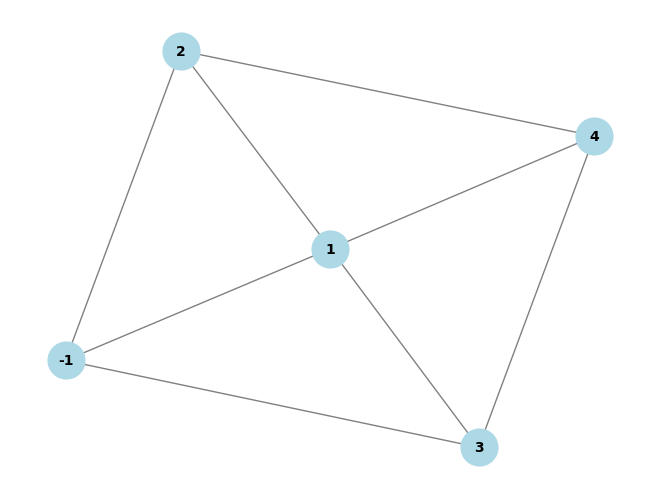

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(graph):
    """
    주어진 그래프 정보를 바탕으로 그래프를 시각화합니다.

    Parameters:
    graph (dict): 노드와 에지를 포함하는 그래프 정보. 각 키는 노드(색상)이며,
                  값은 해당 노드에 인접한 노드(색상)의 집합입니다.
    """
    G = nx.Graph()

    # 그래프 구성: 노드와 에지 추가
    for node, edges in graph.items():
        G.add_node(node)
        for edge in edges:
            G.add_edge(node, edge)
    print(G)
    # 노드 위치 결정
    pos = nx.spring_layout(G)

    # 그래프 드로잉
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700, font_size=10, font_weight='bold')

    # 표시
    plt.show()

# 앞서 생성한 그래프를 사용하여 드로잉
draw_graph(graph)


Graph with 5 nodes and 8 edges


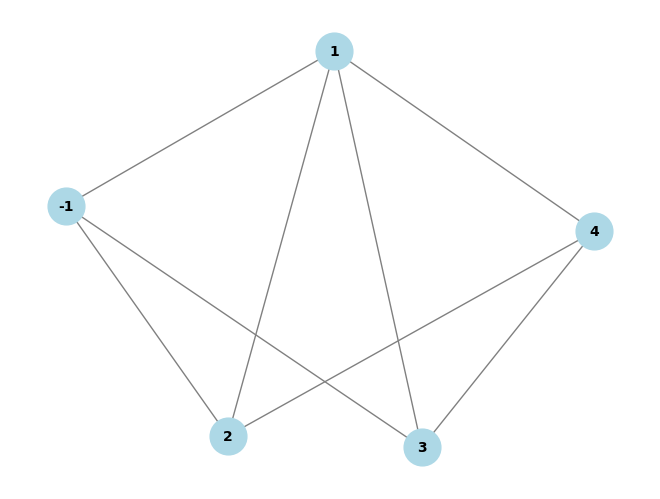

In [23]:

def draw_graph(graph):
    """
    주어진 그래프 정보를 바탕으로 그래프를 시각화합니다.

    Parameters:
    graph (dict): 노드와 에지를 포함하는 그래프 정보. 각 키는 노드(색상)이며,
                  값은 해당 노드에 인접한 노드(색상)의 집합입니다.
    """
    G = nx.Graph()

    # 그래프 구성: 노드와 에지 추가
    for node, edges in graph.items():
        G.add_node(node)
        for edge in edges:
            G.add_edge(node, edge)
    print(G)
    # 노드 위치 결정
    pos = nx.spring_layout(G)

    # 그래프 드로잉
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700, font_size=10, font_weight='bold')

    # 표시
    plt.show()

# 앞서 생성한 그래프를 사용하여 드로잉
draw_graph(graph)

Graph with 5 nodes and 8 edges


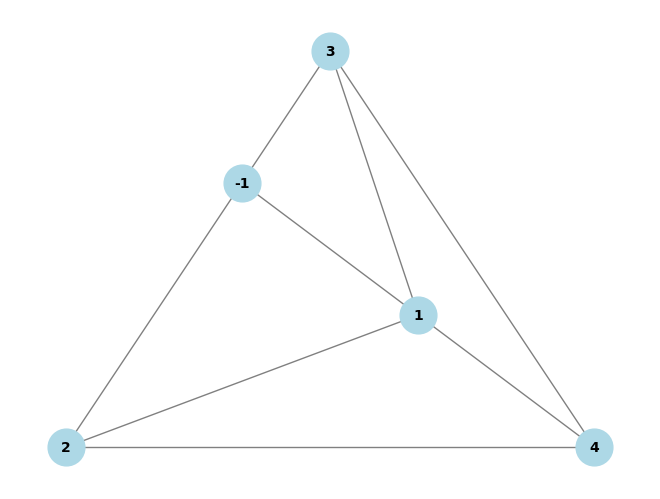

In [24]:

def draw_graph(graph):
    """
    주어진 그래프 정보를 바탕으로 그래프를 시각화합니다.

    Parameters:
    graph (dict): 노드와 에지를 포함하는 그래프 정보. 각 키는 노드(색상)이며,
                  값은 해당 노드에 인접한 노드(색상)의 집합입니다.
    """
    G = nx.Graph()

    # 그래프 구성: 노드와 에지 추가
    for node, edges in graph.items():
        G.add_node(node)
        for edge in edges:
            G.add_edge(node, edge)
    print(G)
    # 노드 위치 결정
    # pos = nx.spring_layout(G)
    # pos = nx.spectral_layout(G)
    pos = nx.planar_layout(G)

    # 그래프 드로잉
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700, font_size=10, font_weight='bold')

    # 표시
    plt.show()

# 앞서 생성한 그래프를 사용하여 드로잉
draw_graph(graph)

In [25]:
def add_boundary(grid):
    # grid의 행과 열의 길이를 구합니다.
    rows, cols = len(grid), len(grid[0])
    
    # 새로운 grid의 크기를 기존보다 각각 2만큼 더 크게 설정합니다.
    # 이렇게 하면 상하좌우에 한 칸씩 여유 공간이 생깁니다.
    new_grid = [[-1] * (cols + 2) for _ in range(rows + 2)]
    
    # 기존 grid의 값을 새로운 grid에 복사합니다.
    # 이때, 새로운 grid에서는 한 칸씩 내부로 이동하여 값을 설정합니다.
    for r in range(rows):
        for c in range(cols):
            new_grid[r + 1][c + 1] = grid[r][c]
    
    return new_grid

# 기존 grid
grid = [
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
]

# 경계가 추가된 새로운 grid 생성
new_grid = add_boundary(grid)

# 결과 출력
for row in new_grid:
    print(row)


[-1, -1, -1, -1, -1]
[-1, 0, 0, 0, -1]
[-1, 0, 1, 0, -1]
[-1, 0, 0, 0, -1]
[-1, -1, -1, -1, -1]


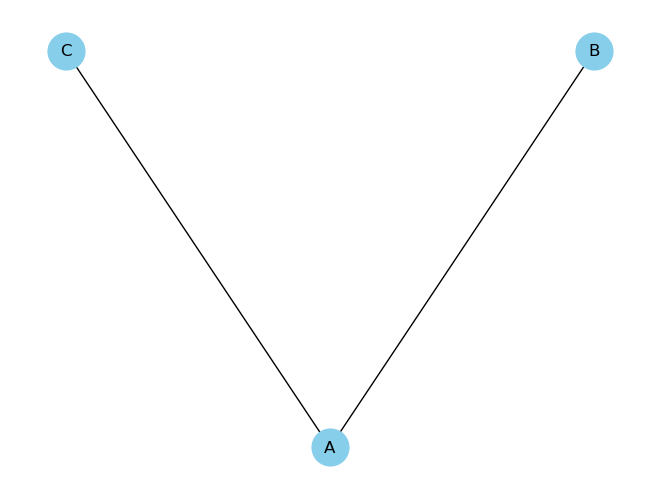

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes
G.add_node('A')
G.add_node('B')
G.add_node('C')

# Add edges
G.add_edge('A', 'B')
G.add_edge('A', 'C')

# Manually set positions
pos = {'A': (0, 0), 'B': (1, 1), 'C': (-1, 1)}

# Draw the graph using the manually set positions
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700)

plt.show()


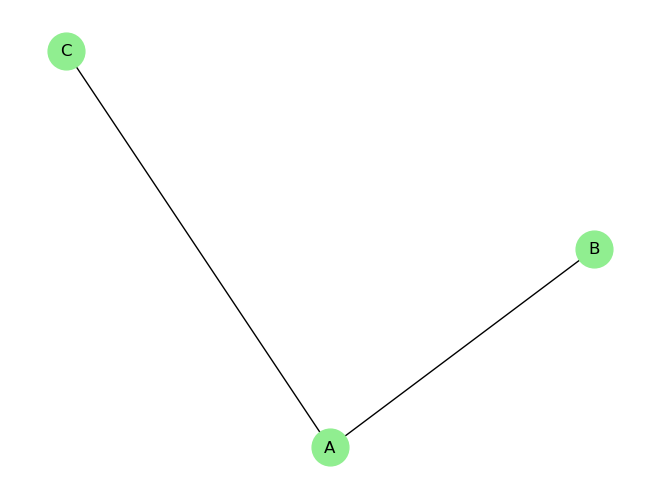

In [27]:
# Adjust position of node 'C'
pos['C'] = (-1, 2)

# Redraw the graph with updated positions
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=700)

plt.show()


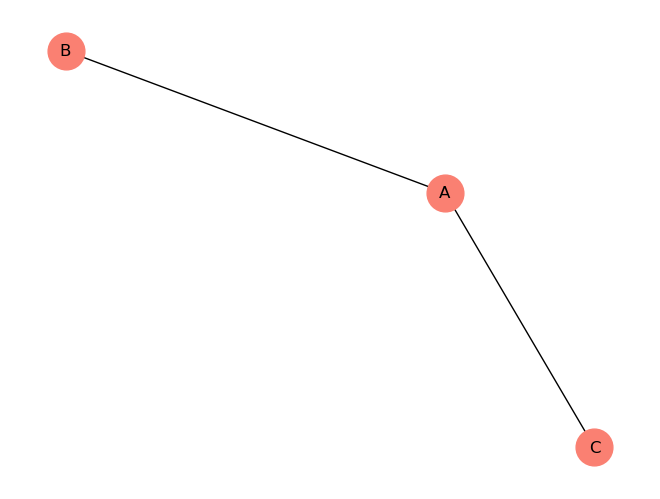

In [28]:
# Use a spring layout to automatically position nodes
pos = nx.spring_layout(G)

# Maybe adjust positions after automatic layout
pos['A'] = (0.5, 0.5)  # Example adjustment

# Draw with the layout
nx.draw(G, pos, with_labels=True, node_color='salmon', node_size=700)

plt.show()


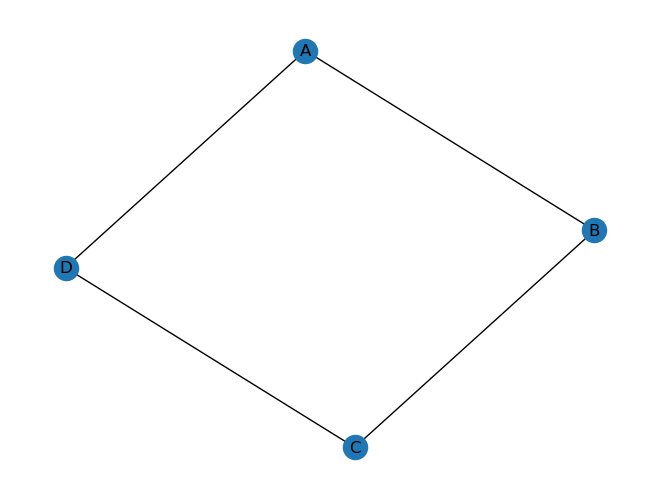

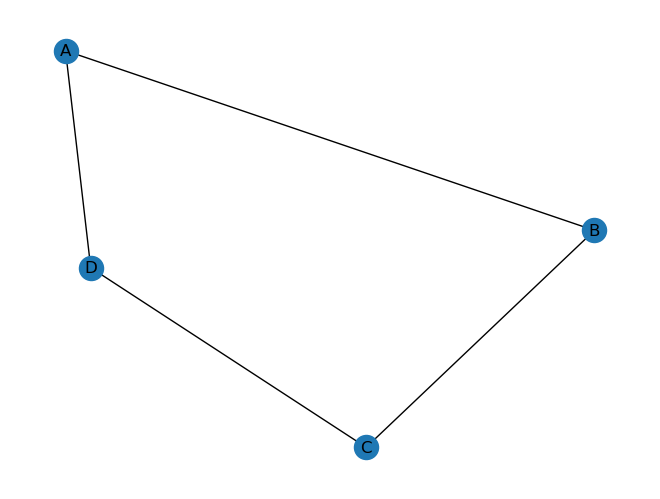

In [29]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'A')])

# 기본 레이아웃 생성
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

# 'A' 노드를 가장 왼쪽에 배치
min_x = min([p[0] for p in pos.values()])
pos['A'] = (min_x - 0.1, pos['A'][1])  # x 좌표를 가장 작은 값보다 작게 조정

nx.draw(G, pos, with_labels=True)
plt.show()


In [22]:
def convert_to_2d_array(coordinates):
    max_x = max(coord[0] for coord in coordinates) + 1
    max_y = max(coord[1] for coord in coordinates) + 1

    two_d_array = [[0] * max_y for _ in range(max_x)]

    for x, y in coordinates:
        two_d_array[x][y] = 1

    return two_d_array

# Example usage:
coordinates = [(0, 1), (0, 2), (1, 3)]
result = convert_to_2d_array(coordinates)

# Print the result
for row in result:
    print(row)


[0, 1, 1, 0]
[0, 0, 0, 1]


In [24]:
def convert_to_coordinates(two_d_array):
    coordinates = []

    for x, row in enumerate(two_d_array):
        for y, value in enumerate(row):
            if value == 1:
                coordinates.append((x, y))

    return coordinates

# Example usage:
input_2d_array = [
    [0, 1, 0],
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 1]
]

result_coordinates = convert_to_coordinates(input_2d_array)

# Print the result
print(result_coordinates)


[(0, 1), (3, 2)]


In [26]:
def unique_elements_2d_array(arr_2d):
    unique_elements = set()

    for row in arr_2d:
        for element in row:
            unique_elements.add(element)

    return len(list(unique_elements))

# Example usage:
example_2d_array = [
    [1, 2, 3],
    [4, 5, 6],
    [1, 2, 3],
    [7, 8, 9]
]

unique_numbers = unique_elements_2d_array(example_2d_array)

print("Unique numbers in the 2D array:",len( unique_numbers))


Unique numbers in the 2D array: 9


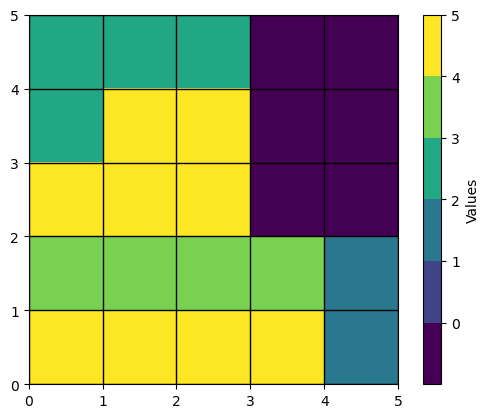

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def draw_colored_grid(grid):
    rows, cols = len(grid), len(grid[0])

    # Create a NumPy array for plotting
    plot_array = np.array(grid)

    # Create a colormap where positive numbers have distinct colors
    cmap = plt.get_cmap('viridis', np.max(grid) + 1)

    # Set the color of cells with negative numbers to white
    plot_array[plot_array < 0] = -1

    # Plot the colored grid
    plt.imshow(plot_array, cmap=cmap, interpolation='none', origin='upper', extent=[0, cols, 0, rows])

    # Display grid lines
    plt.grid(which='both', color='black', linestyle='-', linewidth=1)

    # Display the colorbar
    cbar = plt.colorbar(ticks=range(np.max(grid) + 1))
    cbar.set_label('Values')
    plt.savefig('colored_grid.png')
    # Show the plot
    plt.show()

# Example usage with your provided grid
grid = [
    [2, 2, 2, -1, -1],
    [2, 5, 5, -1, -1],
    [5, 5, 5, -1, -1],
    [3, 3, 3, 3, 1],
    [4, 4, 4, 4, 1]
]

draw_colored_grid(grid)


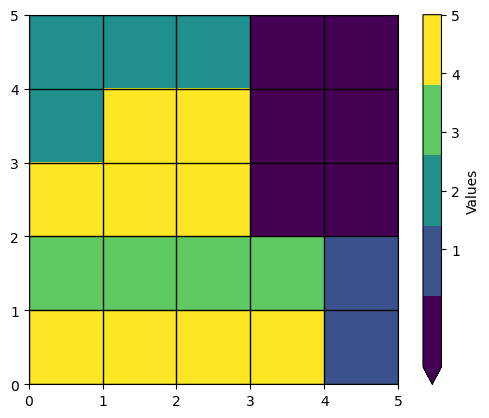

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def draw_colored_grid(grid):
    rows, cols = len(grid), len(grid[0])

    # Create a NumPy array for plotting
    plot_array = np.array(grid)

    # Get unique positive values in the grid
    unique_values = sorted(set(plot_array[plot_array >= 0].flatten()))

    # Create a colormap with a unique color for each positive value
    cmap = ListedColormap(plt.cm.viridis(np.linspace(0, 1, len(unique_values))), name='custom_cmap')

    # Plot the colored grid
    plt.imshow(plot_array, cmap=cmap, interpolation='none', origin='upper', extent=[0, cols, 0, rows])

    # Display grid lines
    plt.grid(which='both', color='black', linestyle='-', linewidth=1)

    # Display the colorbar
    cbar = plt.colorbar(ticks=unique_values, extend='min')
    cbar.set_label('Values')

    # Show the plot
    plt.show()

# Example usage with your provided grid
grid = [
    [2, 2, 2, -1, -1],
    [2, 5, 5, -1, -1],
    [5, 5, 5, -1, -1],
    [3, 3, 3, 3, 1],
    [4, 4, 4, 4, 1]
]

draw_colored_grid(grid)


# Working Modules 
## TODO: ReFactoring using following module

Available modules:
1. exe_draw_grid
2. exe_get_color_coordinates
3. exe_build_graph
4. exe_add_boundary
[[-2, -2, -2, -2, -2, -2, -2], [-5, 2, 2, 2, -1, -1, -4], [-5, 4, 1, 1, -1, -1, -4], [-5, 4, 1, 3, -1, -1, -4], [-5, 4, 4, 3, 3, 3, -4], [-5, 4, 4, 3, 3, 3, -4], [-3, -3, -3, -3, -3, -3, -3]]
-2: {2, -5, -4, -1}
-5: {2, 4, -3, -2}
2: {1, 4, -1, -5, -2}
-1: {1, 2, 3, -4, -2}
-4: {3, -3, -2, -1}
4: {1, 2, 3, -5, -3}
1: {2, 3, 4, -1}
3: {1, 4, -4, -3, -1}
-3: {3, -5, 4, -4}
Graph with 9 nodes and 20 edges


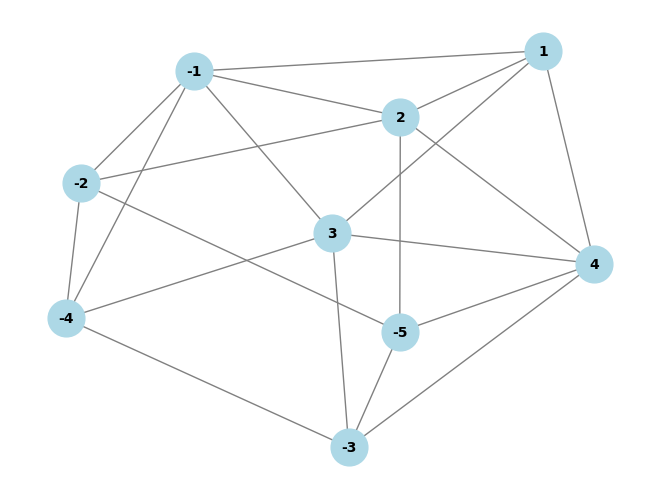

In [36]:
from PIL import Image, ImageDraw
def draw_grid_reversed(grid, savepath):
    # 이미지 객체 생성
    im = Image.new('RGB', (150, 150), (255, 255, 255))
    draw = ImageDraw.Draw(im)

    # s 내의 각 좌표에 사각형 그리기
    for x, y in grid:
        # x, y 좌표에 따라 사각형 그리기 위치 계산
        rect_start_x = x * 20 + 10
        rect_start_y = y * 20 + 10
        rect_end_x = (x + 1) * 20 + 10
        rect_end_y = (y + 1) * 20 + 10
        draw.rectangle([rect_start_x, rect_start_y, rect_end_x, rect_end_y],
                       fill=(192, 192, 192), outline=None, width=0)
        # x, y 좌표에 따라 텍스트 위치 계산 및 텍스트 추가
        text_position_x = rect_start_x + 5
        text_position_y = rect_start_y + 5
        draw.text((text_position_x, text_position_y), f"{x}{y}", fill=(0, 0, 0))

    # 이미지 보기
    im.show()

    # 이미지 파일로 저장
    im.save(savepath)

def draw_grid(coords, outfile):
    """
    주어진 좌표 리스트를 사용하여 사각형과 좌표 텍스트를 그린 이미지를 생성하고 저장하는 함수.
    parameters:
    coords (list of tuples):그리기를 원하는 좌표의 리스트. 각 튜플은 (행, 열) 형식.
    outfile (str): 생성된 이미지를 저장할 파일 이름.
    """
    # 이미지 객체 생성
    im = Image.new('RGB', (150, 150), (255, 255, 255))
    draw = ImageDraw.Draw(im)

    # s 내의 각 좌표에 사각형 그리기 (첫 번째 원소를 행으로, 두 번째 원소를 열로)
    for row, col in coords:
        # row, col 좌표에 따라 사각형 그리기 위치 계산
        rect_start_x = col * 20 + 10
        rect_start_y = row * 20 + 10
        rect_end_x = (col + 1) * 20 + 10
        rect_end_y = (row + 1) * 20 + 10
        draw.rectangle([rect_start_x, rect_start_y, rect_end_x, rect_end_y],
                       fill=(192, 192, 192), outline=None, width=0)
        # row, col 좌표에 따라 텍스트 위치 계산 및 텍스트 추가
        text_position_x = rect_start_x + 5
        text_position_y = rect_start_y + 5
        draw.text((text_position_x, text_position_y), f"{row}{col}", fill=(0, 0, 0))

    # 이미지 보기
    im.show()

    # 이미지 파일로 저장
    im.save(outfile)


def exe_draw_grid():

    savepath_reversed = 'output_reversed.png'
    savepath = 'output.png'
    grid = [
        (0, 0), (0, 1), (0, 2), (0, 3),
        (1, 0), (1, 1), (1, 2), (1, 3),
        (2, 0), (2, 1), (2, 2),
        (3, 0), (3, 1), (3, 2),
        (4, 2),
        (5, 2), (5, 3)
    ]
    draw_grid_reversed(grid, savepath_reversed)
    draw_grid(grid, savepath)

####################################################################################

def get_color_coordinates(grid):
    """
    그리드에서 각 색상별로 해당 색상의 좌표를 리스트로 반환하는 함수.

    Parameters:
    grid (list of lists): 2차원 그리드. 각 요소는 색상 값을 나타내는 정수.

    Returns:
    dict: 각 색상별 좌표 리스트를 포함하는 딕셔너리. 키는 색상 값, 값은 해당 색상의 좌표 리스트.
    """
    color_coordinates = {}  # 색상별 좌표를 저장할 딕셔너리

    for row_idx, row in enumerate(grid):
        for col_idx, color in enumerate(row):
            if color not in color_coordinates:
                color_coordinates[color] = []
            color_coordinates[color].append((row_idx, col_idx))

    return color_coordinates



def get_color_at(grid, row, col):
    """

    :param grid : list of lists consists of row,col. int element represent color
    :param row:  int
    :param col: int
    :return:  color value of element (row,col) of grid
    """
    if row < len(grid) and row >=0 and col >=0 and col < len(grid[0]):
        return grid[row][col]
    else:
        return None

def exe_get_color_coordinates():
    grid = [
        [2, 2, 2, -1, -1],
        [4, 1, 1, -1, -1],
        [4, 1, 3, -1, -1],
        [4, 4, 3, 3, 3],
        [4, 4, 3, 3, 3]
    ]
    colors = get_color_coordinates(grid)
    color = get_color_at(grid, -1, 3)
    print(colors, color)

######################################################
###########     graph      ###########################
######################################################
def build_graph_from_grid(grid, include_outside = True):
    nrows, ncols = len(grid), len(grid[0])
    graph = {}

    # 인접 셀을 확인하기 위한 방향 벡터
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    if not include_outside:
        for r in range(nrows)[1:nrows-1]:
            for c in range(ncols)[1:ncols-1]:
                color = grid[r][c]
                if color not in graph and color > 0:
                    graph[color] = set()
    
                # 현재 셀의 색상과 인접한 다른 색상들 찾기
                for dr, dc in directions:
                    nr, nc = r + dr, c + dc
                    if 0 <= nr < nrows and 0 <= nc < ncols:
                        neighbor_color = grid[nr][nc]
                        if include_outside:
                            if neighbor_color > 0 and neighbor_color != color :
                                graph[color].add(neighbor_color)
                        else:
                            if color < 0 or neighbor_color < 0:
                                break
                            elif neighbor_color != color:
                                graph[color].add(neighbor_color)
        return graph                        
                        

    for r in range(nrows):
        for c in range(ncols):
            color = grid[r][c]
            if color not in graph:
                graph[color] = set()

            # 현재 셀의 색상과 인접한 다른 색상들 찾기
            for dr, dc in directions:
                nr, nc = r + dr, c + dc
                if 0 <= nr < nrows and 0 <= nc < ncols:
                    neighbor_color = grid[nr][nc]
                    if neighbor_color != color:
                        graph[color].add(neighbor_color)
    return graph

import networkx as nx
import matplotlib.pyplot as plt
def draw_weighted_graph(graph):
    pos = nx.spring_layout(graph)
    node_sizes=[1000*graph.nodes[node]['weight'] for node in graph.nodes]
    nx.draw(graph, pos, with_labels=True, node_size=node_sizes, node_color='skyblue', edge_color='gray')
    node_labels = nx.get_node_attributes(graph, 'weight')
    nx.draw_networkx_labels(graph, pos, labels=node_labels)
    
    
def draw_graph(graph):
    """
    주어진 그래프 정보를 바탕으로 그래프를 시각화.

    Parameters:
    graph (dict): 노드와 에지를 포함하는 그래프 정보. 각 키는 노드(색상)이며,
                  값은 해당 노드에 인접한 노드(색상)의 집합입니다.
    """
    G = nx.Graph()

    # 그래프 구성: 노드와 에지 추가
    for node, edges in graph.items():
        G.add_node(node)
        for edge in edges:
            G.add_edge(node, edge)
    print(G)
    # 노드 위치 결정
    pos = nx.spring_layout(G)

    # 그래프 드로잉
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700, font_size=10, font_weight='bold')

    # 표시
    plt.show()



def exe_build_graph():
    grid = [
        [2, 2, 2, -1, -1],
        [4, 1, 1, -1, -1],
        [4, 1, 3, -1, -1],
        [4, 4, 3, 3, 3],
        [4, 4, 3, 3, 3]
    ]
    grid = [[-2, -2, -2, -2, -2, -2, -2],
                [-5,  2,  2,  2, -1, -1, -4],
                [-5,  4,  1,  1, -1, -1, -4],
                [-5,  4,  1,  3, -1, -1, -4],
                [-5,  4,  4,  3,  3,  3, -4],
                [-5,  4,  4,  3,  3,  3, -4],
                [-3, -3, -3, -3, -3, -3, -3]]
    # 그래프 구성
    graph = build_graph_from_grid(grid)

    # 그래프 출력
    for node, edges in graph.items():
        print(f"{node} : {edges}")

    # 앞서 생성한 그래프를 사용하여 드로잉
    draw_graph_with_boundary(graph)

def add_boundary(grid):
    rows, cols = len(grid), len(grid[0])

    # 새로운 grid의 크기를 기존보다 각각 2만큼 더 크게 설정.
    # 이렇게 하면 상하좌우에 한 칸씩 여유 공간이 생
    new_grid = [[-1] * (cols + 2) for _ in range(rows + 2)]

    # 기존 grid의 값을 새로운 grid에 복사.
    # 이때, 새로운 grid에서는 한 칸씩 내부로 이동하여 값을 설정.
    for r in range(rows):
        for c in range(cols):
            new_grid[r + 1][c + 1] = grid[r][c]

    return new_grid


def add_custom_boundary(grid):
    """
    동서남북 각 경계에 외부 공간을 추가하고 각기 다른 값을 할당
    북쪽 경계: -2 값 할당
    남쪽 경계: -3 값 할당
    동쪽 경계: -4 값 할당
    서쪽 경계: -5 값 할당
    기존 grid의 각 셀은 새로운 grid에서 한 칸씩 내부로 이동하여 값 유지
    :param grid: 입력 list of cell coord(row,col)
    :return:new_grid
    """
    rows, cols = len(grid), len(grid[0])

    # 새로운 grid의 크기를 기존보다 각각 2만큼 더 크게 설정하고,
    # 북쪽(-2)과 남쪽(-3) 경계를 설정합니다.
    new_grid = [[-2] * (cols + 2) if r == 0 or r == rows + 1 else [-1] * (cols + 2) for r in range(rows + 2)]

    # 동쪽(-4)과 서쪽(-5) 경계를 설정합니다.
    for r in range(1, rows + 1):
        new_grid[r][0] = -5  # 서쪽
        new_grid[r][cols + 1] = -4  # 동쪽

    # 남쪽 경계를 -3으로 설정합니다.
    new_grid[rows + 1] = [-3] * (cols + 2)

    # 기존 grid의 값을 새로운 grid에 복사합니다.
    for r in range(rows):
        for c in range(cols):
            new_grid[r + 1][c + 1] = grid[r][c]

    return new_grid

def print_graph(graph):
    # 그래프 출력
    for node, edges in graph.items():
        print(f"{node}: {edges}")
        
def exe_add_boundary():
    grid = [
        [2, 2, 2, -1, -1],
        [4, 1, 1, -1, -1],
        [4, 1, 3, -1, -1],
        [4, 4, 3, 3, 3],
        [4, 4, 3, 3, 3]
    ]
    new_grid = [[-2, -2, -2, -2, -2, -2, -2],
                [-5,  2,  2,  2, -1, -1, -4],
                [-5,  4,  1,  1, -1, -1, -4],
                [-5,  4,  1,  3, -1, -1, -4],
                [-5,  4,  4,  3,  3,  3, -4],
                [-5,  4,  4,  3,  3,  3, -4],
                [-3, -3, -3, -3, -3, -3, -3]]
#    new_grid = add_boundary(grid)
#    print(new_grid)
#    graph = build_graph_from_grid(new_grid)
#    draw_graph(graph)

    new_grid = add_custom_boundary(grid)
    print(new_grid)
    graph = build_graph_from_grid(new_grid, include_outside=True)
    print_graph(graph)
    draw_graph(graph)



# 사용자 입력에 따라 모듈을 실행하는 메인 함수
def main():
    # 사용 가능한 모듈 이름 나열
    modules = {
        "1": exe_draw_grid,
        "2": exe_get_color_coordinates,
        "3": exe_build_graph, # full graph including outside cells
        "4": exe_add_boundary
    }

    # 사용자에게 모듈 선택을 안내
    print("Available modules:")
    for key, name in modules.items():
        print(f"{key}. {name.__name__}")

    # 사용자 입력 받기
    choice = input("Enter the number of the module to run: ")

    # 선택된 모듈 실행
    if choice in modules:
        modules[choice]()
    else:
        print("Invalid module number.")



if __name__ == '__main__':
    main()


2 : {1, 4, -1, -5, -2}
4 : {1, 2, 3, -5, -3}
1 : {2, 3, 4, -1}
3 : {1, 4, -4, -3, -1}
Graph with 9 nodes and 14 edges


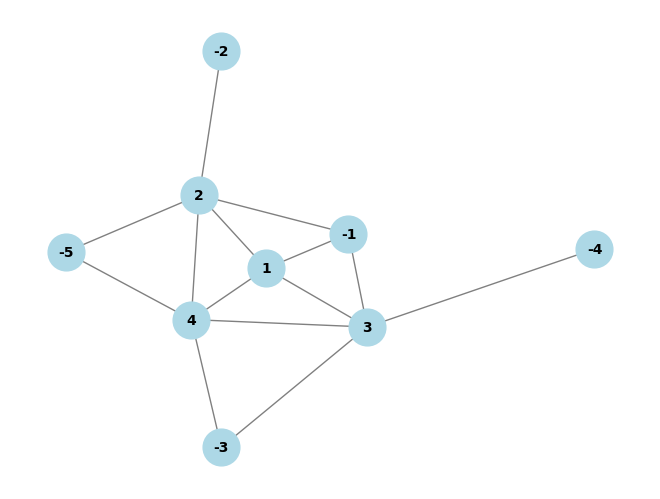

In [37]:
 def build_graph_from_grid(grid):
    nrows, ncols = len(grid), len(grid[0])
    graph = {}

    # 인접 셀을 확인하기 위한 방향 벡터
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    for r in range(nrows):
        for c in range(ncols):
            color = grid[r][c]
            if color not in graph:
                graph[color] = set()

            # 현재 셀의 색상과 인접한 다른 색상들 찾기
            for dr, dc in directions:
                nr, nc = r + dr, c + dc
                if 0 <= nr < nrows and 0 <= nc < ncols:
                    neighbor_color = grid[nr][nc]
                    if neighbor_color != color:
                        graph[color].add(neighbor_color)
    return graph


def build_graph_inside_only(grid):
    nrows, ncols = len(grid), len(grid[0])
    graph = {}

    # 인접 셀을 확인하기 위한 방향 벡터
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    for r in range(nrows)[1:nrows-1]:
        for c in range(ncols)[1:ncols-1]:
            color = grid[r][c]
            if color not in graph and color > 0:
                graph[color] = set()

            # 현재 셀의 색상과 인접한 다른 색상들 찾기
            for dr, dc in directions:
                
                nr, nc = r + dr, c + dc
                if 0 <= nr < nrows and 0 <= nc < ncols:
                    neighbor_color = grid[nr][nc]
                    if color < 0 or neighbor_color < 0:
                        break
                    elif neighbor_color != color:
                        graph[color].add(neighbor_color)
    return graph          

def build_graph_not_connect_outside(grid):
    nrows, ncols = len(grid), len(grid[0])
    graph = {}

    # 인접 셀을 확인하기 위한 방향 벡터
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    for r in range(nrows)[1:nrows-1]:
        for c in range(ncols)[1:ncols-1]:
            color = grid[r][c]
            if color not in graph and color > 0:
                graph[color] = set()

            # 현재 셀의 색상과 인접한 다른 색상들 찾기
            for dr, dc in directions:
                nr, nc = r + dr, c + dc
                if 0 <= nr < nrows and 0 <= nc < ncols:
                    neighbor_color = grid[nr][nc]
                    if color < 0 and neighbor_color < 0:
                        break
                    elif neighbor_color != color:
                        graph[color].add(neighbor_color)
    return graph

def exe_build_graph():

    grid = [[-2, -2, -2, -2, -2, -2, -2],
                [-5,  2,  2,  2, -1, -1, -4],
                [-5,  4,  1,  1, -1, -1, -4],
                [-5,  4,  1,  3, -1, -1, -4],
                [-5,  4,  4,  3,  3,  3, -4],
                [-5,  4,  4,  3,  3,  3, -4],
                [-3, -3, -3, -3, -3, -3, -3]]
    # 선택적 그래프 구성 
    graph = build_graph_from_grid(grid)
    graph = build_graph_inside_only(grid)
    graph = build_graph_not_connect_outside(grid)

    # 그래프 출력
    for node, edges in graph.items():
        print(f"{node} : {edges}")

    # 앞서 생성한 그래프를 사용하여 드로잉
    draw_graph_with_boundary(graph)

def exe_build_graph_inside_only():
    grid = [[-2, -2, -2, -2, -2, -2, -2],
            [-5,  2,  2,  2, -1, -1, -4],
            [-5,  4,  1,  1, -1, -1, -4],
            [-5,  4,  1,  3, -1, -1, -4],
            [-5,  4,  4,  3,  3,  3, -4],
            [-5,  4,  4,  3,  3,  3, -4],
            [-3, -3, -3, -3, -3, -3, -3]]
    
    print(new_grid)
    graph = build_graph_inside_only(grid)
    print_graph(graph)
    draw_graph(graph)

import numpy as np
def draw_graph_with_boundary(graph):
    """
    주어진 그래프 정보를 바탕으로 그래프를 시각화
    -2:맨 위로
    -3:맨 아래쪽
    -4:맨 오른쪽
    -5:맨 왼쪽

    Parameters:
    graph (dict): 노드와 에지를 포함하는 그래프 정보. 각 키는 노드(색상)이며,
                  값은 해당 노드에 인접한 노드(색상)의 집합입니다.
    """
    G = nx.Graph()

    # 그래프 구성: 노드와 에지 추가
    for node, edges in graph.items():
        G.add_node(node)
        for edge in edges:
            G.add_edge(node, edge)
    print(G)
    
    # 노드 위치 결정
    # outside space: boundary는 맨 가장자리에 위치
    pos = nx.spring_layout(G)
    pos[-2] = (0, 2)     
    pos[-3] = (0, -2)     
    pos[-4] = (2, 0)     
    pos[-5] = (-2, 0)    
        
    pos.update(nx.spring_layout(G, pos=pos, fixed=[-2,-3,-4,-4]))
    
    # 그래프 드로잉
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700, font_size=10, font_weight='bold')

    # 표시
    plt.show()
    
exe_build_graph()

In [1]:
def main():
    # 사용 가능한 모듈 이름 나열
    modules = {
        "1": exe_draw_grid,
        "2": exe_get_color_coordinates,
        "3": exe_build_graph,
        "4": exe_build_graph_inside_only,
        "5": exe_add_boundary
    }

    # 사용자에게 모듈 선택을 안내
    print("Available modules:")
    for key, name in modules.items():
        print(f"{key}. {name.__name__}")

    # 사용자 입력 받기
    choice = input("Enter the number of the module to run: ")

    # 선택된 모듈 실행
    if choice in modules:
        modules[choice]()
    else:
        print("Invalid module number.")

          

if __name__ == '__main__':

    main()

NameError: name 'exe_draw_grid' is not defined

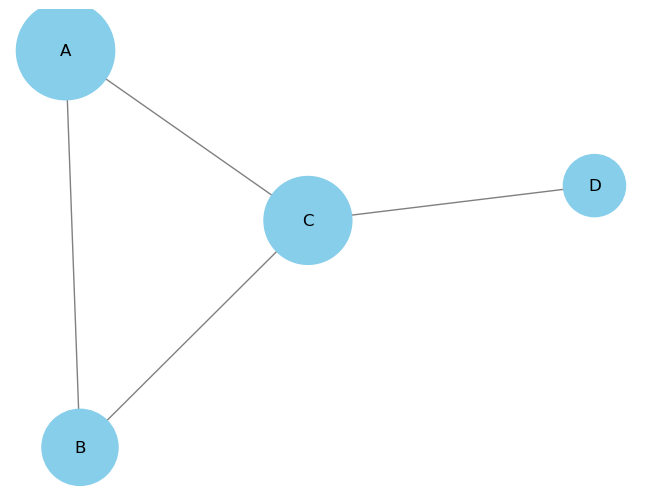

In [67]:
import networkx as nx
import matplotlib.pyplot as plt

# 그래프 생성 및 노드 추가
G = nx.Graph()
G.add_nodes_from([
    ('A', {'weight': 5}),
    ('B', {'weight': 3}),
    ('C', {'weight': 4}),
    ('D', {'weight': 2})
])

# 간선 추가
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'C'), ('C', 'D')])

# 노드 가중치에 따른 크기 조정
node_sizes = [1000 * G.nodes[node]['weight'] for node in G.nodes]

# 그래프 시각화
pos = nx.spring_layout(G)  # 노드 위치 결정
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color='skyblue', edge_color='gray')

plt.show()


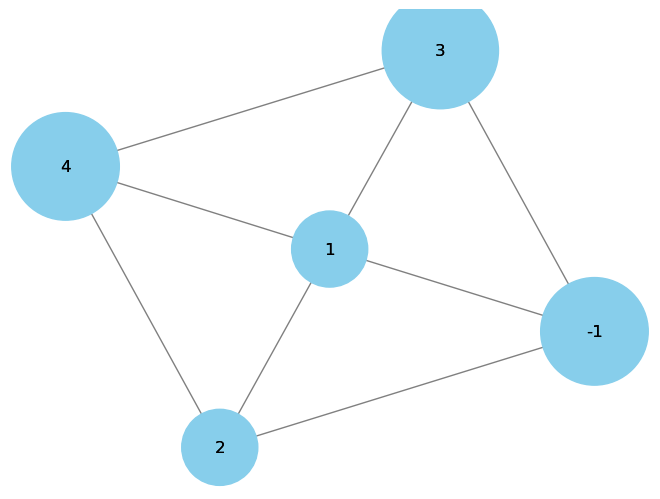

In [76]:
def draw_weighted_graph(graph):
    pos = nx.spring_layout(graph)
    node_sizes=[1000*graph.nodes[node]['weight'] for node in graph.nodes]
    nx.draw(graph, pos, with_labels=True, node_size=node_sizes, node_color='skyblue', edge_color='gray')
    node_labels = nx.get_node_attributes(graph, 'weight')
    nx.draw_networkx_labels(graph, pos)
  

def build_weighted_graph_from_grid(grid):
    """
    각 색상 그룹을 노드로 표현하고, 노드의 가중치로 색상별 셀의 개수를 지정
    두 색상 그룹이 인접한 경우, 에지 생성
    :param grid: two-dimensional array. each element represents colors(plan)
    :return: graph as a NetworkX object with weights representing the count of cells per color
    """
    import networkx as nx

    nrows, ncols = len(grid), len(grid[0])
    graph = nx.Graph()

    # 색상별 셀의 개수를 저장하기 위한 딕셔너리
    color_counts = {}

    # 인접 셀을 확인하기 위한 방향 벡터
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    for r in range(nrows):
        for c in range(ncols):
            color = grid[r][c]
            # 색상별 셀의 개수 업데이트
            if color in color_counts:
                color_counts[color] += 1
            else:
                color_counts[color] = 1

            # 노드가 아직 그래프에 없으면 추가
            if not graph.has_node(color):
                graph.add_node(color, weight=color_counts[color])
            else:
                # 노드의 가중치(색상별 셀의 개수) 업데이트
                nx.set_node_attributes(graph, {color: {'weight': color_counts[color]}})

            # 현재 셀의 색상과 인접한 다른 색상들 찾기
            for dr, dc in directions:
                nr, nc = r + dr, c + dc
                if 0 <= nr < nrows and 0 <= nc < ncols:
                    neighbor_color = grid[nr][nc]
                    if neighbor_color != color:
                        graph.add_edge(color, neighbor_color)

    return graph
grid = [
        [2, 2, 2, -1, -1],
        [4, 1, 1, -1, -1],
        [4, 1, 3, -1, -1],
        [4, 4, 3, 3, 3],
        [4, 4, 3, 3, 3]
    ]
graph = build_weighted_graph_from_grid(grid)
draw_weighted_graph(graph)

In [74]:
type(graph)

networkx.classes.graph.Graph

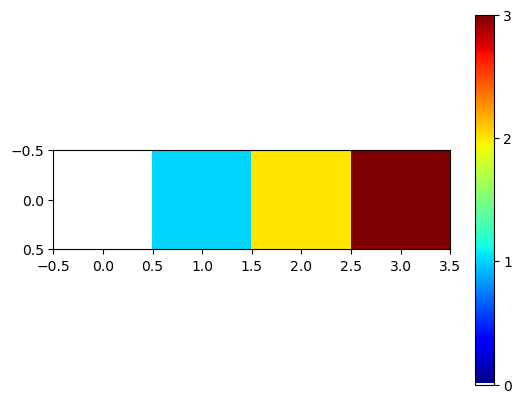

In [47]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a predefined colormap
predefined_cmap = plt.cm.jet

# Extract the colors from the predefined colormap
colors = predefined_cmap(np.linspace(0, 1, predefined_cmap.N))

# Modify specific colors (e.g., change the first color to white)
colors[0] = [1, 1, 1, 1]  # RGBA value for white

# Create a ListedColormap using the modified colors
custom_cmap = ListedColormap(colors)

# Plot using the custom colormap
plt.imshow([[0, 1, 2, 3]], cmap=custom_cmap)
plt.colorbar(ticks=[0, 1, 2, 3])
plt.show()
